In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

df = pd.read_csv('Spotify_data.csv') 

/var/folders/7f/xrny7_8d32q6xy6nps28xn8m0000gn/T/ipykernel_94902/252457784.py:8: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Spotify_data.csv')


In [98]:
df.head()

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.382,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,22nd Jim,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.193,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,Veeze,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.835,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.252,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.380,True,0.0,2023.0,April,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   album_id           375141 non-null  object 
 1   album_name         375141 non-null  object 
 2   album_popularity   375141 non-null  int64  
 3   album_type         375141 non-null  object 
 4   artists            375141 non-null  object 
 5   artist_0           375139 non-null  object 
 6   artist_1           87079 non-null   object 
 7   artist_2           38300 non-null   object 
 8   artist_3           13823 non-null   object 
 9   artist_4           6087 non-null    object 
 10  artist_id          375141 non-null  object 
 11  duration_sec       375141 non-null  float64
 12  label              375117 non-null  object 
 13  release_date       375119 non-null  object 
 14  total_tracks       375141 non-null  int64  
 15  track_id           375141 non-null  object 
 16  tr

In [100]:
target_df = ['track_id', 'track_name', 'genre_0', 'acousticness','danceability', 'energy','instrumentalness', 'key', 
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']

df_new = pd.DataFrame(df, columns=target_df)

In [101]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          375141 non-null  object 
 1   track_name        375139 non-null  object 
 2   genre_0           209863 non-null  object 
 3   acousticness      374364 non-null  float64
 4   danceability      374364 non-null  float64
 5   energy            374364 non-null  float64
 6   instrumentalness  374364 non-null  float64
 7   key               374364 non-null  float64
 8   liveness          374364 non-null  float64
 9   loudness          374364 non-null  float64
 10  mode              374364 non-null  float64
 11  speechiness       374364 non-null  float64
 12  tempo             374364 non-null  float64
 13  valence           374364 non-null  float64
dtypes: float64(11), object(3)
memory usage: 40.1+ MB


In [102]:
df_new.dropna(subset=['genre_0'], inplace=True)

In [103]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209863 entries, 334 to 375140
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          209863 non-null  object 
 1   track_name        209862 non-null  object 
 2   genre_0           209863 non-null  object 
 3   acousticness      209374 non-null  float64
 4   danceability      209374 non-null  float64
 5   energy            209374 non-null  float64
 6   instrumentalness  209374 non-null  float64
 7   key               209374 non-null  float64
 8   liveness          209374 non-null  float64
 9   loudness          209374 non-null  float64
 10  mode              209374 non-null  float64
 11  speechiness       209374 non-null  float64
 12  tempo             209374 non-null  float64
 13  valence           209374 non-null  float64
dtypes: float64(11), object(3)
memory usage: 24.0+ MB


In [104]:
# Get the counts of each genre
counts = df_new['genre_0'].value_counts()

# Create a list of genres that have a count of 2 or more
genres_to_keep = counts[counts >= 2].index

# Filter the DataFrame to only include rows with genres in the above list
df_new = df_new[df_new['genre_0'].isin(genres_to_keep)]

In [105]:
df_new['genre_0'].value_counts()[:22]

karaoke                 15344
dance pop                4496
classical                3848
album rock               3707
baroque                  3421
atl hip hop              3337
pop                      2803
hip hop                  2426
k-pop                    2348
big room                 2231
adult standards          2126
alternative metal        2049
workout product          2039
arkansas country         2002
sleep                    1880
piano cover              1869
contemporary country     1798
r&b                      1687
g funk                   1616
classic country pop      1485
east coast hip hop       1413
lullaby                  1403
Name: genre_0, dtype: int64

In [106]:
df_new.isna().sum()

track_id              0
track_name            1
genre_0               0
acousticness        489
danceability        489
energy              489
instrumentalness    489
key                 489
liveness            489
loudness            489
mode                489
speechiness         489
tempo               489
valence             489
dtype: int64

In [107]:
df_new = df_new.dropna(subset=['track_name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'])

In [108]:
df_new.isna().sum()

track_id            0
track_name          0
genre_0             0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

In [109]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209007 entries, 334 to 375140
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          209007 non-null  object 
 1   track_name        209007 non-null  object 
 2   genre_0           209007 non-null  object 
 3   acousticness      209007 non-null  float64
 4   danceability      209007 non-null  float64
 5   energy            209007 non-null  float64
 6   instrumentalness  209007 non-null  float64
 7   key               209007 non-null  float64
 8   liveness          209007 non-null  float64
 9   loudness          209007 non-null  float64
 10  mode              209007 non-null  float64
 11  speechiness       209007 non-null  float64
 12  tempo             209007 non-null  float64
 13  valence           209007 non-null  float64
dtypes: float64(11), object(3)
memory usage: 23.9+ MB


In [110]:
df_new.nunique()


track_id            209007
track_name          158305
genre_0               2642
acousticness          5024
danceability          1301
energy                2699
instrumentalness      5402
key                     12
liveness              1754
loudness             29698
mode                     2
speechiness           1644
tempo                80894
valence               1988
dtype: int64

In [111]:
x = df_new.iloc[:, 3:]
y = df_new["genre_0"]


In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=42, shuffle = True, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
xtrain.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000
mean,0.390651,0.559269,0.534550,0.248046,5.254493,0.205101,-11.006378,0.650712,0.101412,118.366976,0.456557
std,0.367364,0.193528,0.273754,0.369293,3.574755,0.186238,6.752129,0.476746,0.134758,30.574084,0.269833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035400,0.434000,0.315000,0.000000,2.000000,0.097100,-13.882000,0.000000,0.036000,94.989000,0.228000
50%,0.262000,0.583000,0.558000,0.000624,5.000000,0.126000,-9.040000,1.000000,0.048200,118.783500,0.444000
75%,0.766000,0.704000,0.762000,0.607000,8.000000,0.251000,-6.244000,1.000000,0.093400,137.383750,0.673000
max,0.996000,0.988000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,0.967000,247.981000,1.000000


In [ ]:
xtrain.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [ ]:
xtrain.shape

(167498, 11)

In [ ]:
col = xtrain.columns

scalerx = MinMaxScaler()

xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [ ]:
xtrain.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000,167498.000000
mean,0.392220,0.566062,0.534550,0.248046,0.477681,0.205101,0.768600,0.650712,0.104873,0.477323,0.456557
std,0.368839,0.195879,0.273754,0.369293,0.324978,0.186238,0.105926,0.476746,0.139356,0.123292,0.269833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035542,0.439271,0.315000,0.000000,0.181818,0.097100,0.723488,0.000000,0.037229,0.383050,0.228000
50%,0.263052,0.590081,0.558000,0.000624,0.454545,0.126000,0.799448,1.000000,0.049845,0.479002,0.444000
75%,0.769076,0.712551,0.762000,0.607000,0.727273,0.251000,0.843311,1.000000,0.096587,0.554009,0.673000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

ValueError: y contains previously unseen labels: 'classic sudanese pop'

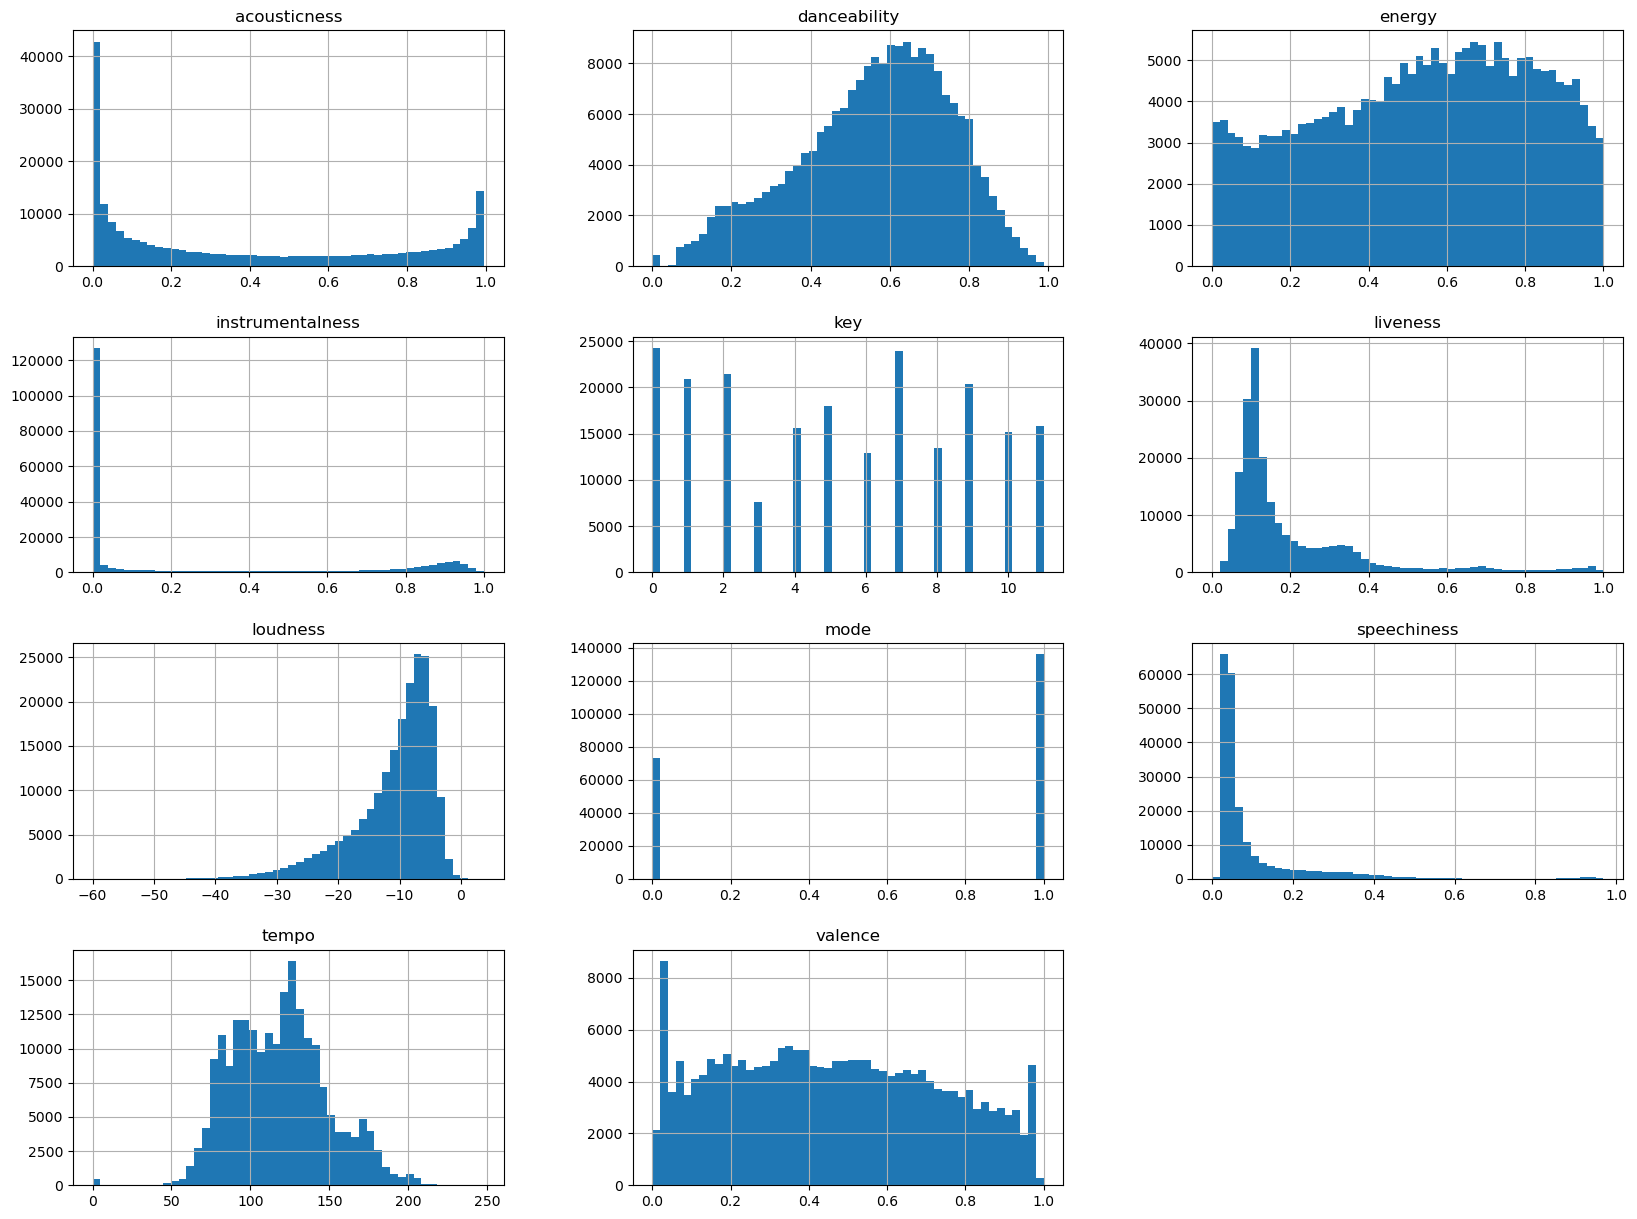

In [ ]:
df_new.hist(bins = 50, figsize = (20,15))

plt.show()


In [ ]:
def getsomeinfo(df):
    num_rows = df.shape[0]
    num_columns = df.shape[1]

    # Display basic info
    missing_values = df.isna().sum()
    missing_values_col = missing_values[missing_values > 0]
    print(f"Number of rows: {num_rows}")
    print(f"Number of columns: {num_columns}")
    if not missing_values_col.empty:
        print(f"The dataframe has missing values in these columns:\n{missing_values_col}")
    else:
        print("There are no missing values in this dataframe.")
    print(f"Values look like this:\n\n{df.describe()}")
    print(df.info())

    # Display pairwise correlation matrix
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
    plt.title('Pairwise Correlation Matrix')
    plt.show()

Number of rows: 375141
Number of columns: 49
The dataframe has missing values in these columns:
artist_0                 2
artist_1            288062
artist_2            336841
artist_3            361318
artist_4            369054
label                   24
release_date            22
track_name               2
genre_0             165278
genre_1             255655
genre_2             297922
genre_3             326531
genre_4             343824
acousticness           777
analysis_url           777
danceability           777
duration_ms            777
energy                 777
instrumentalness       777
key                    777
liveness               777
loudness               777
mode                   777
speechiness            777
tempo                  777
time_signature         777
track_href             777
type                   777
uri                    777
valence                777
explicit                10
track_popularity        10
release_year            22
release_month

/Users/sm/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


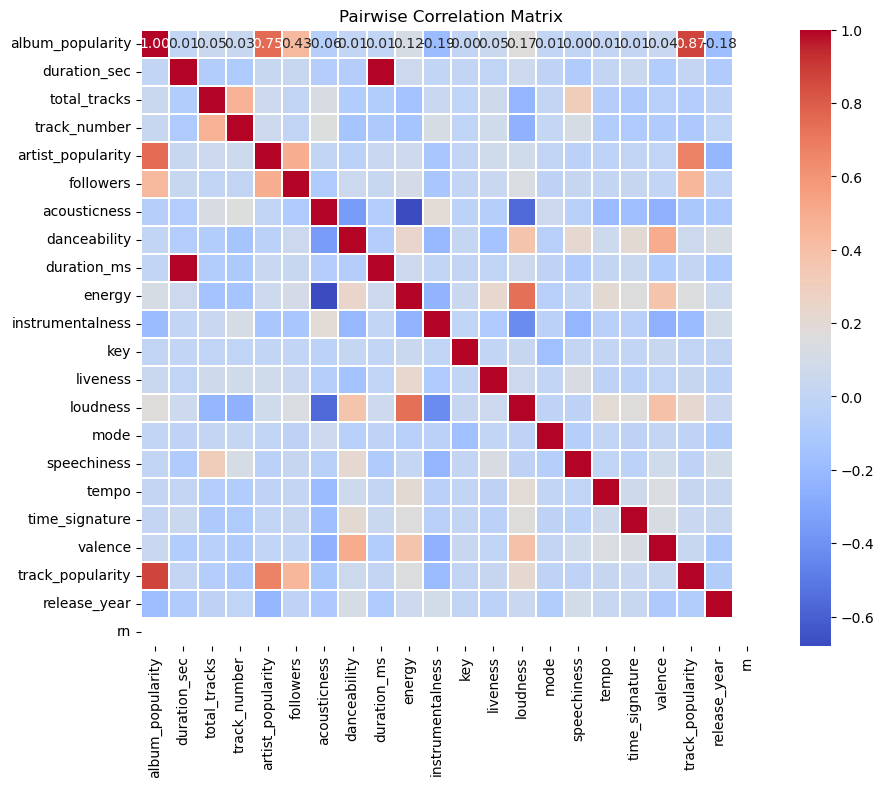

In [ ]:
getsomeinfo(df)

### Handling missing values

As we can see, we do have some missing data. 
label                24
release_date         22
track_name            2
acousticness        777
analysis_url        777
danceability        777
duration_ms         777
energy              777
instrumentalness    777
key                 777
liveness            777
loudness            777
mode                777
speechiness         777
tempo               777
time_signature      777
track_href          777
type                777
uri                 777
valence             777
explicit             10
track_popularity     10
release_year         22
release_month        22


We can choose to either get rid of the coresspondeing au that have theese 207 values, the whole attribute or use imputation to subset for missing values. Let's go by imputation, as the amount of missing values in relation to our whole dataset is very low. 

Now a better way to do this to make sure that we do not have any missing values in our test_set or training set is to use SimpleIMputer from sklean. 

The benenift is that it will store the median value of all our attributes, which enables us to impute missing value on our test_Set, training_Set, validation_set and any other new data in the future. 
